In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


This is the overall dataset and description and for each feature.

In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


For columns CHA RAD looks data is nominal or descrete.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

data does not have any null values.

# Data Visualization:-

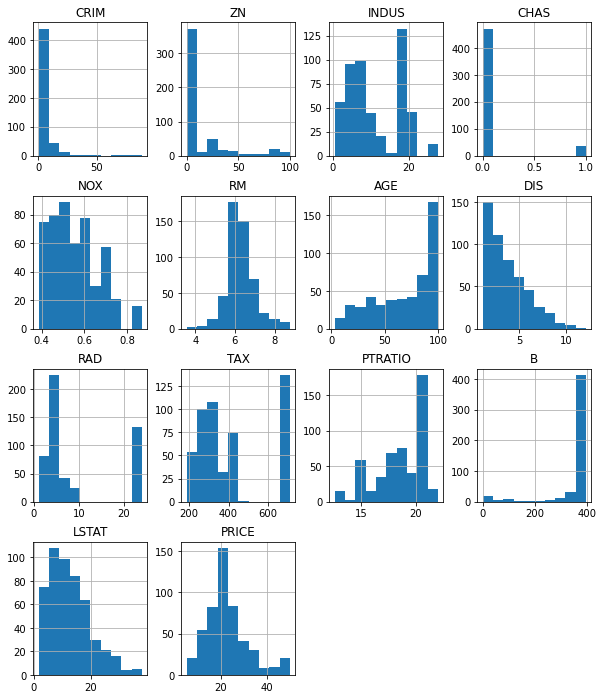

In [8]:

df.hist(figsize=(10,12));


from above data dist plots I can see the data distribution for each column. its showing the columns having continuous and descrete data.

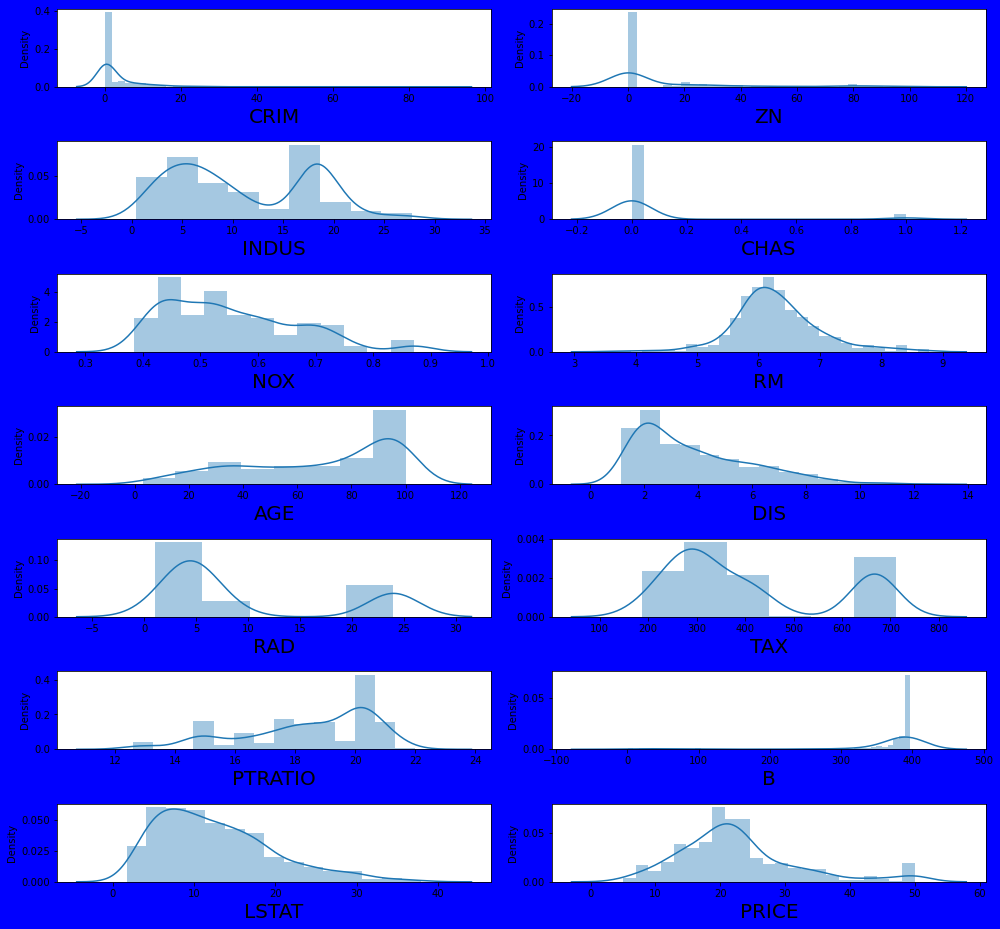

In [9]:
plt.figure(figsize=(14,13),facecolor = 'blue')
plotnumber = 1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(7,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize =20)
        
    plotnumber+=1
plt.tight_layout()

from above plots it clearly shows chat data distribution is not normal. data looks skewed for each column.

In [10]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

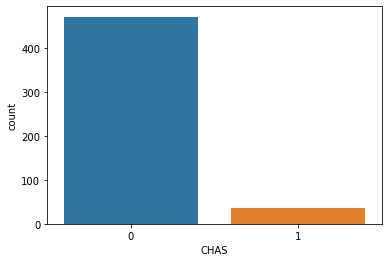

In [11]:
sns.countplot(x='CHAS',data=df)
plt.show()

here 1 is for tract bound river and 0 for others

In [12]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

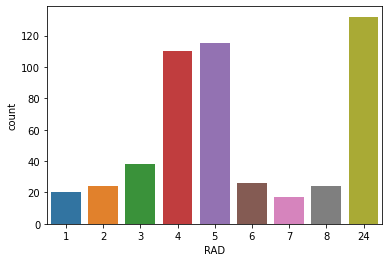

In [13]:
sns.countplot(x='RAD',data=df)
plt.show()

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

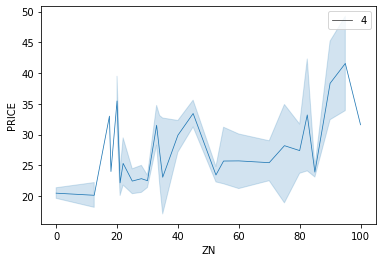

In [15]:

sns.lineplot(x='ZN',y='PRICE',data=df,size =4)
plt.show()

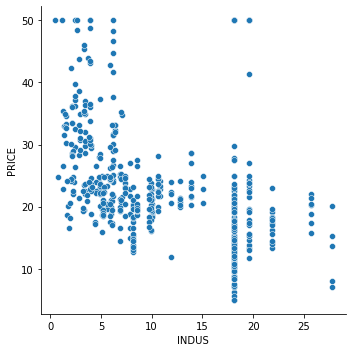

In [16]:
sns.relplot(x='INDUS',y='PRICE',data=df)
plt.show()

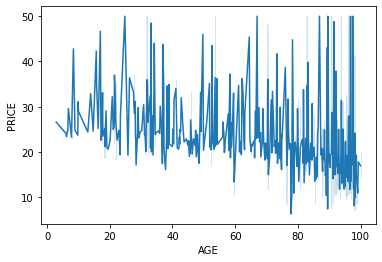

In [17]:
sns.lineplot(x='AGE',y='PRICE',data=df)
plt.show()

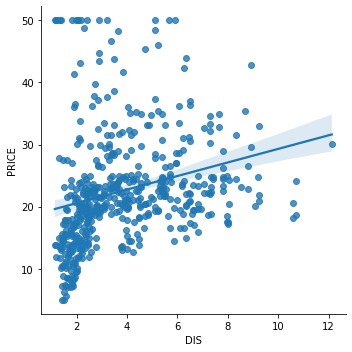

In [18]:
sns.lmplot(x='DIS',y='PRICE',data=df)
plt.show()

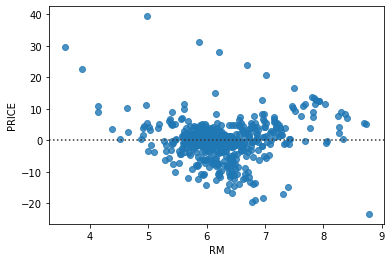

In [19]:
sns.residplot(x='RM',y='PRICE',data=df)
plt.show()

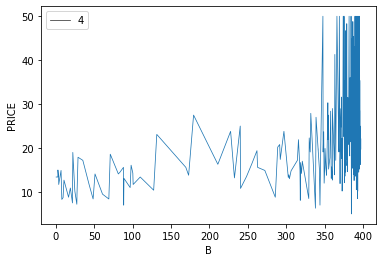

In [20]:
sns.lineplot(x='B',y='PRICE',data=df,size =4)
plt.show()

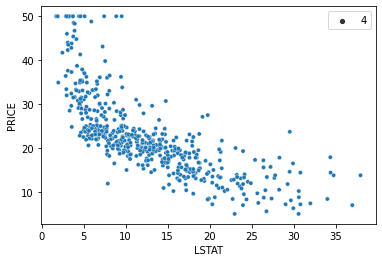

In [21]:
sns.scatterplot(x='LSTAT',y='PRICE',data=df,size =4)
plt.show()

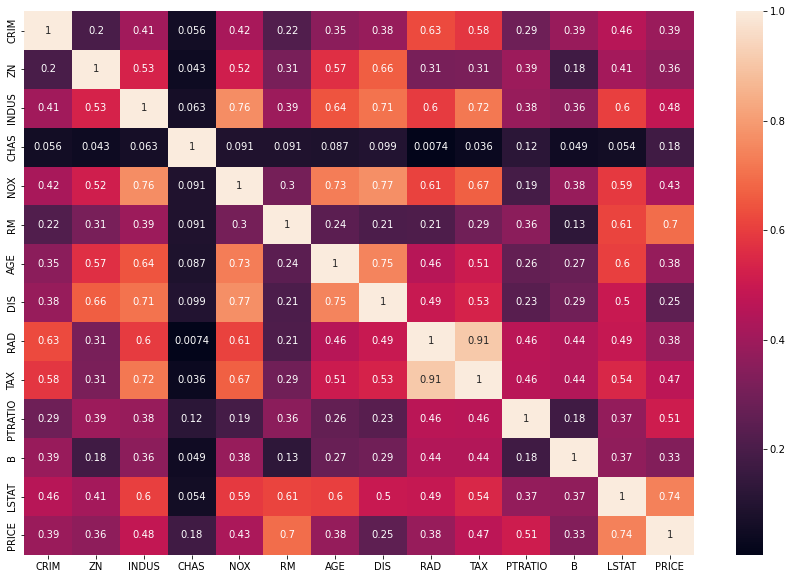

In [22]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':10})
plt.show()

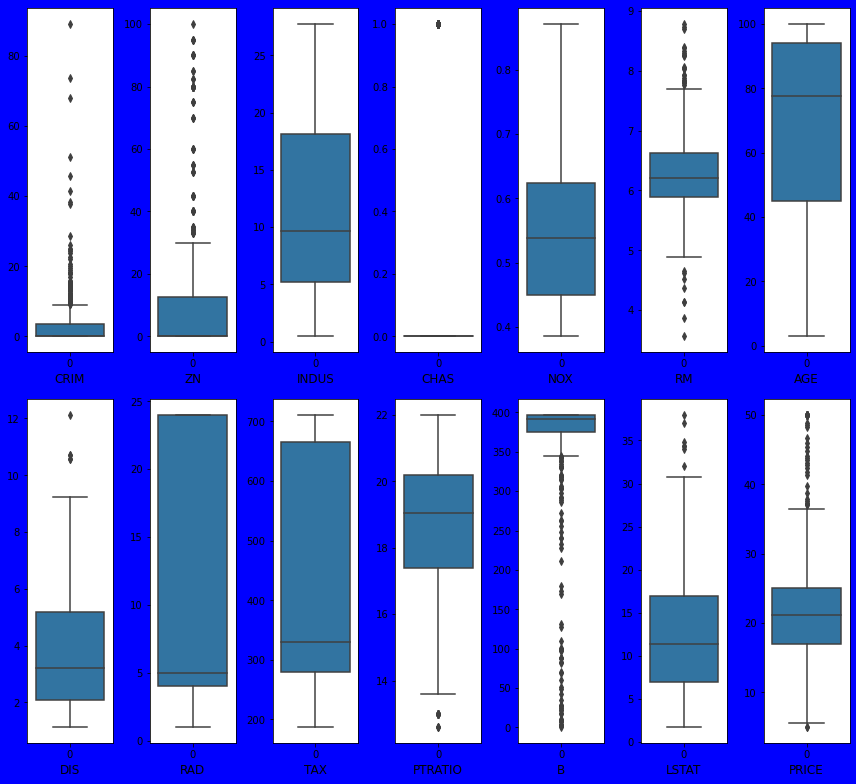

In [23]:
plt.figure(figsize = (12,11),facecolor = 'blue')
plotnumber = 1
for column in df:
    if plotnumber<=14:
        ax = plt.subplot(2,7,plotnumber)
        sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize =12)
    plotnumber+=1
plt.tight_layout()

from above boxplot it shows most of the features have outliers present. 

In [24]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
PRICE      1.108098
dtype: float64

In [25]:
df['CRIM'] = np.log(df['CRIM'])
df['RM'] = np.log(df['RM'])
df['B'] = np.log(df['B'])

In [26]:
df.skew()

CRIM       0.405934
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM        -0.294663
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -4.826998
LSTAT      0.906460
PRICE      1.108098
dtype: float64

In [27]:
x = df.drop('PRICE',axis =1)
y = df['PRICE']

In [28]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,2.31,0,0.538,1.883275,65.2,4.0900,1,296,15.3,5.983684,4.98
1,-3.600502,0.0,7.07,0,0.469,1.859574,78.9,4.9671,2,242,17.8,5.983684,9.14
2,-3.601235,0.0,7.07,0,0.469,1.971996,61.1,4.9671,2,242,17.8,5.973377,4.03
3,-3.430523,0.0,2.18,0,0.458,1.945624,45.8,6.0622,3,222,18.7,5.977949,2.94
4,-2.672924,0.0,2.18,0,0.458,1.966693,54.2,6.0622,3,222,18.7,5.983684,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0,0.573,1.886008,69.1,2.4786,1,273,21.0,5.971236,9.67
502,-3.095111,0.0,11.93,0,0.573,1.811562,76.7,2.2875,1,273,21.0,5.983684,9.08
503,-2.800824,0.0,11.93,0,0.573,1.942476,91.0,2.1675,1,273,21.0,5.983684,5.64
504,-2.211009,0.0,11.93,0,0.573,1.916040,89.3,2.3889,1,273,21.0,5.974954,6.48


In [29]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [30]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
x_scaled.shape[1]

13

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns


In [35]:
vif

,vif,Features
0,7.891728,CRIM
1,2.382664,ZN
2,4.007866,INDUS
3,1.070779,CHAS
4,4.676778,NOX
5,1.880722,RM
6,3.133018,AGE
7,3.880288,DIS
8,9.706035,RAD
9,8.999356,TAX


from above dataframe it shows vif score for CRIM RAD and TAX is more than 5 means the multicolinearity exists in those columns

<function matplotlib.pyplot.show(close=None, block=None)>

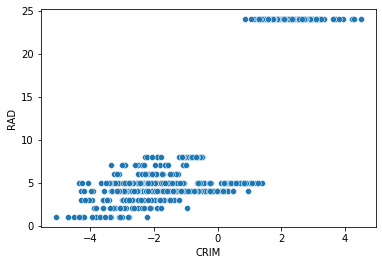

In [36]:
sns.scatterplot(x='CRIM',y='RAD',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

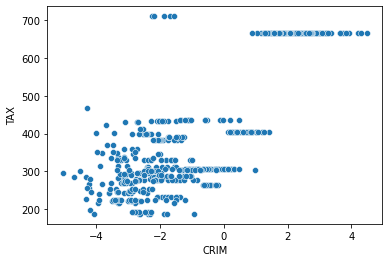

In [37]:
sns.scatterplot(x='CRIM',y= 'TAX',data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

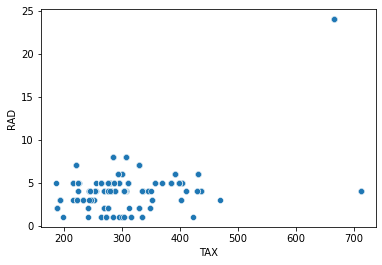

In [38]:
sns.scatterplot(x='TAX',y='RAD',data=df)
plt.show

from above scatterplot it shows that multicolienarity exists in those column So I will drop the columns which are contrubiting 
less in target variable. So CRIM is contributing less 

In [39]:
x.drop('CRIM',axis=1,inplace=True)
x

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0,0.538,1.883275,65.2,4.0900,1,296,15.3,5.983684,4.98
1,0.0,7.07,0,0.469,1.859574,78.9,4.9671,2,242,17.8,5.983684,9.14
2,0.0,7.07,0,0.469,1.971996,61.1,4.9671,2,242,17.8,5.973377,4.03
3,0.0,2.18,0,0.458,1.945624,45.8,6.0622,3,222,18.7,5.977949,2.94
4,0.0,2.18,0,0.458,1.966693,54.2,6.0622,3,222,18.7,5.983684,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,1.886008,69.1,2.4786,1,273,21.0,5.971236,9.67
502,0.0,11.93,0,0.573,1.811562,76.7,2.2875,1,273,21.0,5.983684,9.08
503,0.0,11.93,0,0.573,1.942476,91.0,2.1675,1,273,21.0,5.983684,5.64
504,0.0,11.93,0,0.573,1.916040,89.3,2.3889,1,273,21.0,5.974954,6.48


In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)

accuracy 0.5643567129431635 random_state 0
accuracy 0.5643567129431635 random_state 0
accuracy 0.7364251511968394 random_state 1
accuracy 0.7364251511968394 random_state 1
accuracy 0.767591378301254 random_state 2
accuracy 0.767591378301254 random_state 2
accuracy 0.7790917516245977 random_state 3
accuracy 0.7790917516245977 random_state 3
accuracy 0.7146816387558474 random_state 4
accuracy 0.7233768038367918 random_state 5
accuracy 0.6453594172901531 random_state 6
accuracy 0.6091007058353837 random_state 7
accuracy 0.6985951864057265 random_state 8
accuracy 0.7481086469114684 random_state 9
accuracy 0.6590208362538159 random_state 10
accuracy 0.674141556878668 random_state 11
accuracy 0.7238948216493015 random_state 12
accuracy 0.7266101599813034 random_state 13
accuracy 0.5856336011825558 random_state 14
accuracy 0.6625770688779109 random_state 15
accuracy 0.6261511981145618 random_state 16
accuracy 0.66896619629718 random_state 17
accuracy 0.663157113969272 random_state 18
accuracy

In [44]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.8001778246089913 Random State 85


In [45]:
from sklearn.ensemble import RandomForestRegressor
rt =  RandomForestRegressor()
rt.fit(x_train,y_train)
predrt = rt.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.878249673304222


In [48]:
mae = mean_absolute_error(y_test,predrt)
mse = mean_squared_error(y_test,predrt)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 10.774905901960771 Root Mean Squared Error= 3.2825151792430103


In [94]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
predkn = knn.predict(x_test)
print('accuracy',r2_score(y_test,predkn))


accuracy 0.7431436388716002


In [95]:
mae = mean_absolute_error(y_test,predkn)
mse = mean_squared_error(y_test,predkn)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 22.73179215686275 Root Mean Squared Error= 4.76778692444018


In [49]:
from sklearn.svm import SVR
svr =  SVR()
svr.fit(x_train,y_train)
predsv = svr.predict(x_test)
print('accuracy',r2_score(y_test,predsv))

accuracy 0.64309183247991


In [52]:
mae = mean_absolute_error(y_test,predsv)
mse = mean_squared_error(y_test,predsv)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 31.586378657360765 Root Mean Squared Error= 5.620176034374792


In [57]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)
predat = ad.predict(x_test)
print('accuracy',r2_score(y_test,predat))

accuracy 0.8551295075442369


In [58]:
mae = mean_absolute_error(y_test,predat)
mse = mean_squared_error(y_test,predat)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 12.821040949499938 Root Mean Squared Error= 3.580648118637175


In [59]:
from sklearn.ensemble import BaggingRegressor
bg = BaggingRegressor()
bg.fit(x_train,y_train)
predbt = bg.predict(x_test)
print('accuracy',r2_score(y_test,predbt))

accuracy 0.866636204970975


In [60]:
mae = mean_absolute_error(y_test,predbt)
mse = mean_squared_error(y_test,predbt)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 11.802698039215684 Root Mean Squared Error= 3.4355054998086794


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)
predgd = gd.predict(x_test)
print('accuracy',r2_score(y_test,predgd))

accuracy 0.9037736854870227


In [69]:
mae = mean_absolute_error(y_test,predgd)
mse = mean_squared_error(y_test,predgd)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 8.516030406723884 Root Mean Squared Error= 2.9182238445197934


In [67]:
import xgboost 
from xgboost import XGBRFRegressor
xb = XGBRFRegressor()
xb.fit(x_train,y_train)
predxb = xb.predict(x_test)
print('accuracy',r2_score(y_test,predxb))


accuracy 0.8619614083728298


In [70]:
mae = mean_absolute_error(y_test,predxb)
mse = mean_squared_error(y_test,predxb)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 12.216417614537102 Root Mean Squared Error= 3.495199223869378


from all above models Gradient boostig is givig high accuracy and low error compared to others. So i will choose this model
as my final model.

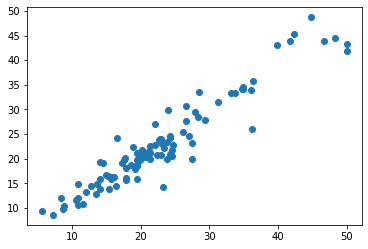

In [71]:
plt.scatter(y_test,predgd)
plt.xlable = ('Actual Price of Boston House')
plt.ylable = ('Predicated Price of Avocado')
plt.title = ('Actual Price v/s Predicated Price')
plt.show()

In [97]:
import pickle
file = open('BostonHouse.pkl', 'wb')
pickle.dump(gd, file)
model=open('BostonHouse.pkl', 'rb')
Avacoda=pickle.load(model)